## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [2]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

Original Image:
(512, 512)


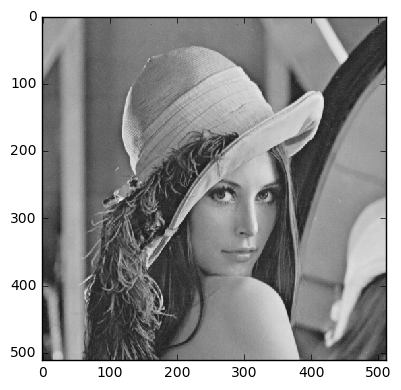

In [3]:
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)

print ('Original Image:')
print(lena_im.shape)
io.imshow(lena_im)

import scipy.ndimage

lena_nearest = scipy.ndimage.zoom(lena_im, 2, order=0)
lena_bilinear = scipy.ndimage.zoom(lena_im, 2, order=1)
lena_cubic = scipy.ndimage.zoom(lena_im, 2, order=3)

factor of 2 with nearest interpolation:
(1024, 1024)


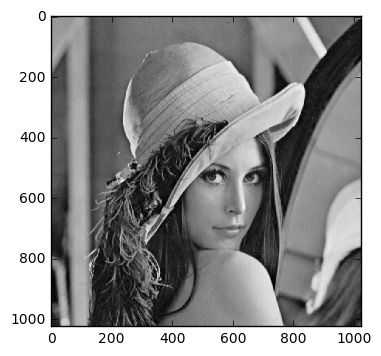

factor of 2 with bilinear interpolation:


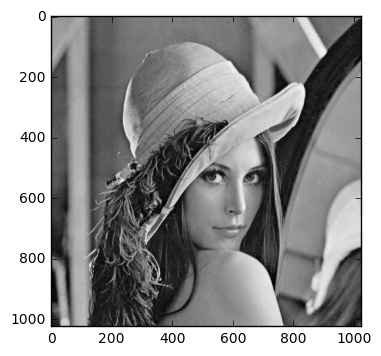

factor of 2 with cubic interpolation:


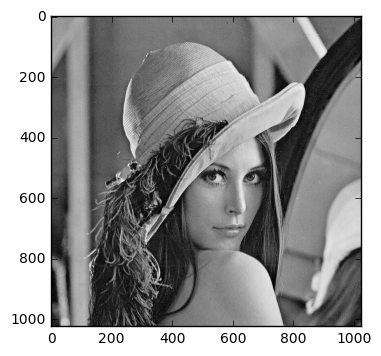

In [73]:
print ('factor of 2 with nearest interpolation:')
print(lena_nearest.shape)
plt.figure
plt.imshow(lena_nearest, cmap=plt.cm.gray)
plt.show()  

print ('factor of 2 with bilinear interpolation:')
plt.figure
plt.imshow(lena_bilinear, cmap=plt.cm.gray)
plt.show()  

print ('factor of 2 with cubic interpolation:')
plt.figure
plt.imshow(lena_cubic, cmap=plt.cm.gray)
plt.show()  

**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


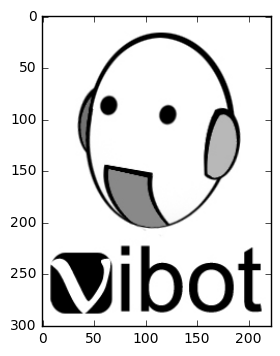

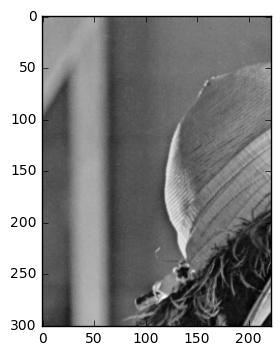

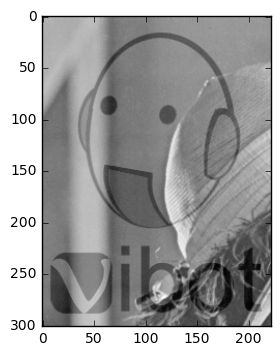

In [4]:
filename2 = './images/vibot-color.jpg'

#print (vibot_grey.shape)
#print (lena_im.shape)

#[x,y] = vibot_grey.shape

from PIL import Image
#from skimage.transform import resize
#im = resize(im, (222, 301))

Vibot_img = Image.open(filename2).convert('L') #vibot 'LA'
width1, height1 = Vibot_img.size   # Get dimensions
#new_width = width1/2
#new_height = height1
#left = 0
#top = (height1 - new_height)/2    # = 0
#right = (width1)/2
#bottom = (height1 + new_height)/2 # = hight
#vibot_crop = Vibot_img.crop((left, top, right, bottom))


im = Image.open(filename) #lena
width2, height2 = im.size   # Get dimensions
#new_width = width2/2
#new_width = width2/2
#new_height = height1  # same height as vibot

#left = (width1)/2
left = 0
right = width1
#right = width1/2 + (width1)/2
top = 0;
#top = (height2 - new_height)/2    # = 0
#bottom = (height2 + new_height)/2  # = hight
bottom = height1
lena_crop = im.crop((left, top, right, bottom))

from skimage import color

#vibot_grey = color.rgb2gray(vibot_crop)
#im = color.rgb2gray(vibot_crop)
#vibot_crop = rescale_intensity(vibot_crop, out_range=(0, 255))

lena = img_as_float(lena_crop)
vibot = img_as_float(Vibot_img)

result = Image.new('L', (width1, height1))

#x_offset = 0
#result.paste(lena, (x_offset,0))
#x_offset = vibot.size
#result.paste(vibot, (x_offset,0))


alpha = 0.2
out = lena * (1.0 - alpha) + vibot * alpha

#img3 = Image.alpha_composite(vibot_crop, lena_crop)


plt.figure
plt.imshow(Vibot_img, cmap=plt.cm.gray)
plt.show()

plt.figure
plt.imshow(lena_crop, cmap=plt.cm.gray)
plt.show()

plt.figure
plt.imshow(out, cmap=plt.cm.gray)
plt.show()




#out = vibot_grey[:,y/2]
#plt.figure
#plt.imshow(out, cmap=plt.cm.gray)
#plt.show()


Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

In [63]:
from skimage.transform import pyramid_gaussian
from skimage.transform import pyramid_laplacian
from skimage.transform import rescale

file_orange = './images/orange.jpeg'
file_apple = './images/apple.jpeg'

orange_img = Image.open(file_orange)
apple_img = Image.open(file_apple)

orange = img_as_float(orange_img)
apple = img_as_float(apple_img)

alpha = 0.2
out = orange * (1.0 - alpha) + apple * alpha

#print(apple_img.shape)
#[rows, cols, dim] = apple_img.shape
rows, cols = apple_img.size
#dim = 3
gpyramid = tuple(pyramid_gaussian(apple_img, downscale=2))
gpyramid_apple = [a for a in gpyramid]

lpyramid = tuple(pyramid_laplacian(apple_img, downscale=2))
lpyramid_apple = [a for a in lpyramid]


gpyramid = tuple(pyramid_gaussian(orange_img, downscale=2))
gpyramid_orange = [a for a in gpyramid]

lpyramid = tuple(pyramid_laplacian(orange_img, downscale=2))
lpyramid_orange = [a for a in lpyramid]

mask = Image.new('RGB', size = (rows, cols), color = (255, 255, 255))

gpyramid = tuple(pyramid_gaussian(mask, downscale=2))
gpyramid_mask = [a for a in gpyramid]

#BL=L1∗(GM)+L2∗(1−GM)
#BL = []
#print(len(gpyramid_mask))
#for i in range(1,len(gpyramid_mask)):
BL = []

for j in gpyramid_mask:
    BL.append(lpyramid_orange[i] * gpyramid_mask[i] + lpyramid_apple[i]*(1-gpyramid_mask[i]))


pyramid_out = rescale(rescale(rescale(BL[3],1.0)+BL[2],1.0) +B[L1],1.0) +BL[0]
 

plt.figure
plt.imshow(out, cmap=plt.cm.gray)
plt.show()



NameError: name 'B' is not defined

Show the your answers.